## Vamos a generar el analisis de outliers y nas

In [1]:
## Importamos las librerias necesarias ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
## Leemos la Base_Demografica de asociados ##

df = pd.read_csv("C:/Users/Usuario/Desktop/Data Science/AED/Proyecto/Data/Base_Demografica.csv", sep=",")

## información del df ##

print(list(df.columns))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23168\2140587471.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Usuario/Desktop/Data Science/AED/Proyecto/Data/Base_Demografica.csv", sep=",")


['str_periodo', 'codigo', 'fecha_ingreso', 'estado', 'nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL', 'fecha_retiro', 'oficina', 'tipo_vinculacion', 'nombre_tipo_vinculacion', 'estado_civil', 'personas_a_cargo', 'personas_a_cargo_menores_18', 'sexo', 'estrato', 'tipo_vivienda', 'nombre_tipo_vivienda', 'doc_corredor', 'nombre_promotor', 'nivel_academico', 'nombre_nivel_academico', 'fecha_nacimiento', 'ingresos', 'fecha_ingresos', 'egresos', 'titulo_obtenido', 'nombre_titulo_obtenido', 'ocupacion', 'nombre_ocupacion', 'ptaje_acierta', 'saldo_aportes', 'ind_inactivo', 'ingresos_deflactados', 'fecha_ingresos_deflactados', 'segmento_ingresos_vs_antiguedad', 'segmento_ciclo_de_vida', 'descripcion_oficina', 'regional', 'zona', 'dtm_fecha_insercion', 'dtm_fecha_creacion', 'edad', 'rango_edad', 'antiguedad_meses', 'antiguedad_anios', 'rango_antiguedad', 'rango_ingreso', 'rango_menores', 'rango_aportes', 'codigo_area_de_conocimiento', 'descripcion_area_de_conocimiento', 'circulo_pr

In [27]:
df.shape

(268047, 125)

In [28]:
print(list(df.columns))

['str_periodo', 'codigo', 'fecha_ingreso', 'estado', 'nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL', 'fecha_retiro', 'oficina', 'tipo_vinculacion', 'nombre_tipo_vinculacion', 'estado_civil', 'personas_a_cargo', 'personas_a_cargo_menores_18', 'sexo', 'estrato', 'tipo_vivienda', 'nombre_tipo_vivienda', 'doc_corredor', 'nombre_promotor', 'nivel_academico', 'nombre_nivel_academico', 'fecha_nacimiento', 'ingresos', 'fecha_ingresos', 'egresos', 'titulo_obtenido', 'nombre_titulo_obtenido', 'ocupacion', 'nombre_ocupacion', 'ptaje_acierta', 'saldo_aportes', 'ind_inactivo', 'ingresos_deflactados', 'fecha_ingresos_deflactados', 'segmento_ingresos_vs_antiguedad', 'segmento_ciclo_de_vida', 'descripcion_oficina', 'regional', 'zona', 'dtm_fecha_insercion', 'dtm_fecha_creacion', 'edad', 'rango_edad', 'antiguedad_meses', 'antiguedad_anios', 'rango_antiguedad', 'rango_ingreso', 'rango_menores', 'rango_aportes', 'codigo_area_de_conocimiento', 'descripcion_area_de_conocimiento', 'circulo_pr

In [30]:
## Escogemos las columnas necesarias ## -- Estas columnas son las que consideramos importantes para nuestro Analisis ##

df = df[['nombre_estado','EDAD_CARTERA_INICIAL','EDAD_CARTERA_FINAL','nombre_tipo_vinculacion','estado_civil','personas_a_cargo','estrato',
         'nombre_tipo_vivienda','nombre_nivel_academico','ingresos','egresos','nombre_ocupacion','ptaje_acierta','edad','regional',
         'antiguedad_anios','suma_productos','saldo_aportes']]

df.head(5)

,nombre_estado,EDAD_CARTERA_INICIAL,EDAD_CARTERA_FINAL,nombre_tipo_vinculacion,estado_civil,personas_a_cargo,estrato,nombre_tipo_vivienda,nombre_nivel_academico,ingresos,egresos,nombre_ocupacion,ptaje_acierta,edad,regional,antiguedad_anios,suma_productos,saldo_aportes
0,Inactivo,6.0,6.0,Mayor 60,Casado,1,4,Propia,Profesional,2250000.0,NaN,Independiente,0,97,Bogota,26,2.0,"2728577,00"
1,Activo Normal,0.0,0.0,Mayor 60,Casado,0,5,Propia,Profesional,4500000.0,NaN,Independiente,0,94,Cali,55,5.0,"2052914,00"
2,Activo Cobranza Interna,0.0,1.0,Mayor 60,Casado,2,6,Desconocida,Profesional,4500000.0,NaN,Asalariado,0,93,Caribe,28,3.0,"6601225,00"
3,Activo Normal,0.0,0.0,Mayor 60,Casado,0,4,Propia,Ninguno,0.0,0.0,Pensionado - Jubilado,806,96,Bogota,13,0.0,"5563990,00"
4,Inactivo,5.0,5.0,Mayor 60,Casado,0,5,Propia,Ninguno,10500000.0,NaN,Asalariado,695,84,Medellin,12,0.0,NaN


In [31]:
## Información del df con las columnas necesarias ##

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268047 entries, 0 to 268046
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            268047 non-null  object 
 1   EDAD_CARTERA_INICIAL     263746 non-null  float64
 2   EDAD_CARTERA_FINAL       266326 non-null  float64
 3   nombre_tipo_vinculacion  268047 non-null  object 
 4   estado_civil             268047 non-null  object 
 5   personas_a_cargo         268047 non-null  int64  
 6   estrato                  268047 non-null  object 
 7   nombre_tipo_vivienda     268047 non-null  object 
 8   nombre_nivel_academico   268047 non-null  object 
 9   ingresos                 268038 non-null  float64
 10  egresos                  119669 non-null  float64
 11  nombre_ocupacion         268047 non-null  object 
 12  ptaje_acierta            268047 non-null  int64  
 13  edad                     268047 non-null  int64  
 14  regi

In [32]:
## Vemos valores nulos x columna ##
valor_nulos = df.isna().sum()
valor_nulos

nombre_estado                   0
EDAD_CARTERA_INICIAL         4301
EDAD_CARTERA_FINAL           1721
nombre_tipo_vinculacion         0
estado_civil                    0
personas_a_cargo                0
estrato                         0
nombre_tipo_vivienda            0
nombre_nivel_academico          0
ingresos                        9
egresos                    148378
nombre_ocupacion                0
ptaje_acierta                   0
edad                            0
regional                        0
antiguedad_anios                0
suma_productos                  1
saldo_aportes                  67
dtype: int64

Según el resultado anterior, cada columna tiene 270.507 filas de datos, y existen cinco filas que contienen valores perdidos:

"EDAD_CARTERA_INICIAL" -- TIENE 4.301 valores perdidos

"EDAD_CARTERA_FINAL"   -- TIENE 1.721 valores perdidos

"ingresos"             -- TIENE 9 valores perdidos

"egresos"                -- TIENE 148.378 valores perdidos

"suma_producto" --- Tiene 1 valor perdido


## Manejo valores perdidos 

In [33]:
## Columna edad cartera inicial y edad cartera final ##

## Si no tiene edad de cartera, según el dominio de la facturacion de la empresa, se encontró que el asociado en cuestión no tenia nada
## Facturado, por lo tanto se decide rellenar los vacios con 0

df['EDAD_CARTERA_INICIAL'] = df['EDAD_CARTERA_INICIAL'].fillna(0)
df['EDAD_CARTERA_FINAL'] = df['EDAD_CARTERA_FINAL'].fillna(0)

print('valores unicos edad inicial:',df['EDAD_CARTERA_INICIAL'].unique()) ## Para validar que el cambio quedo hecho
print('valores unicos edad final:',df['EDAD_CARTERA_FINAL'].unique()) ## Para validar que el cambio quedo hecho

valores unicos edad inicial: [6. 0. 5. 1. 3. 4. 2. 7.]
valores unicos edad final: [6. 0. 1. 5. 4. 3. 7. 2.]


In [34]:
## Columna egresos ##

## Al validar que tiene tantos registros nulos (55% de las filas) se decide eliminar esta columna del df #

df = df.drop(columns="egresos")
df.columns ## validar que haya quedado la eliminacion

Index(['nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL',
       'nombre_tipo_vinculacion', 'estado_civil', 'personas_a_cargo',
       'estrato', 'nombre_tipo_vivienda', 'nombre_nivel_academico', 'ingresos',
       'nombre_ocupacion', 'ptaje_acierta', 'edad', 'regional',
       'antiguedad_anios', 'suma_productos', 'saldo_aportes'],
      dtype='object')

In [35]:
## Columna suma producto ## Al ser solo 1 valor, se decide rellenar con el promedio de la columna

df['suma_productos'] = df['suma_productos'].fillna(int(df['suma_productos'].mean()))
df['suma_productos'].unique() ## validar el resultado

array([ 2.,  5.,  3.,  0.,  1.,  4.,  9.,  7.,  6., 10.,  8., 11., 12.,
       13., 14., 16., 15., 19., 18., 17., 20., 23., 21., 22., 25.])

In [37]:
## Columna Saldo aportes ## Al ser solo 67 valores, se decide eliminar las filas donde saldo aportes es null##

df.dropna(subset=['saldo_aportes'],inplace=True)

In [38]:
## columna ingresos ##  --- Variable de interes para el analisis univariado ##
## Al validar que no son muchos los registros nulos, se decide eliminar las filas nulas ## -- Son 9 

df = df.dropna(subset = ['ingresos'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267971 entries, 0 to 268046
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            267971 non-null  object 
 1   EDAD_CARTERA_INICIAL     267971 non-null  float64
 2   EDAD_CARTERA_FINAL       267971 non-null  float64
 3   nombre_tipo_vinculacion  267971 non-null  object 
 4   estado_civil             267971 non-null  object 
 5   personas_a_cargo         267971 non-null  int64  
 6   estrato                  267971 non-null  object 
 7   nombre_tipo_vivienda     267971 non-null  object 
 8   nombre_nivel_academico   267971 non-null  object 
 9   ingresos                 267971 non-null  float64
 10  nombre_ocupacion         267971 non-null  object 
 11  ptaje_acierta            267971 non-null  int64  
 12  edad                     267971 non-null  int64  
 13  regional                 267971 non-null  object 
 14  antigueda

In [ ]:
## La variable saldo_aportes aparece como objeto -- Debe ser pasada a numerico ##

df['saldo_aportes']= df['saldo_aportes'].str.replace(",",".").astype("float64")

<class 'pandas.core.frame.DataFrame'>
Index: 267971 entries, 0 to 268046
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            267971 non-null  object 
 1   EDAD_CARTERA_INICIAL     267971 non-null  float64
 2   EDAD_CARTERA_FINAL       267971 non-null  float64
 3   nombre_tipo_vinculacion  267971 non-null  object 
 4   estado_civil             267971 non-null  object 
 5   personas_a_cargo         267971 non-null  int64  
 6   estrato                  267971 non-null  object 
 7   nombre_tipo_vivienda     267971 non-null  object 
 8   nombre_nivel_academico   267971 non-null  object 
 9   ingresos                 267971 non-null  float64
 10  nombre_ocupacion         267971 non-null  object 
 11  ptaje_acierta            267971 non-null  int64  
 12  edad                     267971 non-null  int64  
 13  regional                 267971 non-null  object 
 14  antigueda

## Manejo de Outliers ##

count    267971.000000
mean          2.055525
std           2.948351
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max           7.000000
Name: EDAD_CARTERA_INICIAL, dtype: float64


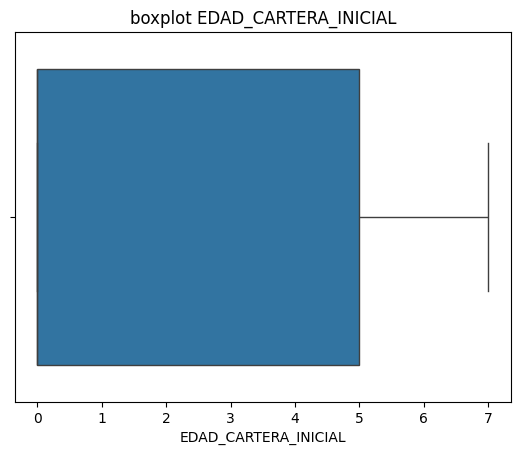

count    267971.000000
mean          1.880304
std           2.692474
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max           7.000000
Name: EDAD_CARTERA_FINAL, dtype: float64


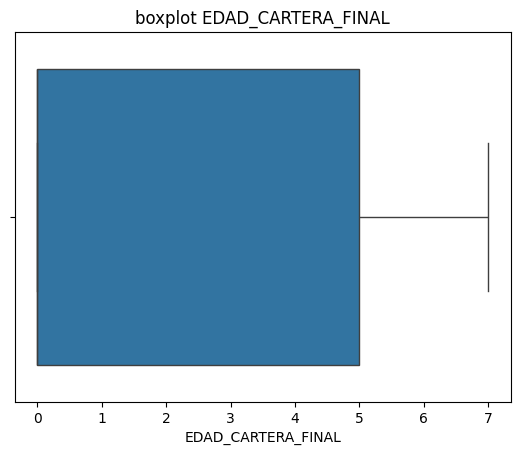

count    267971.000000
mean          0.191767
std           0.595092
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          84.000000
Name: personas_a_cargo, dtype: float64


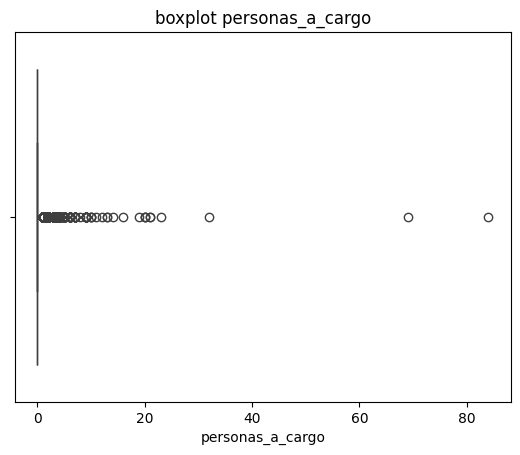

count    2.679710e+05
mean     6.598975e+06
std      5.650909e+07
min      0.000000e+00
25%      2.250000e+06
50%      4.000000e+06
75%      7.092790e+06
max      9.259171e+09
Name: ingresos, dtype: float64


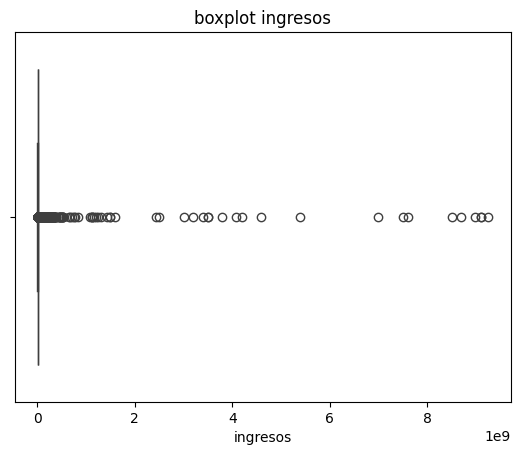

count    267971.000000
mean        448.514007
std         349.610027
min           0.000000
25%           0.000000
50%         611.000000
75%         745.500000
max         999.000000
Name: ptaje_acierta, dtype: float64


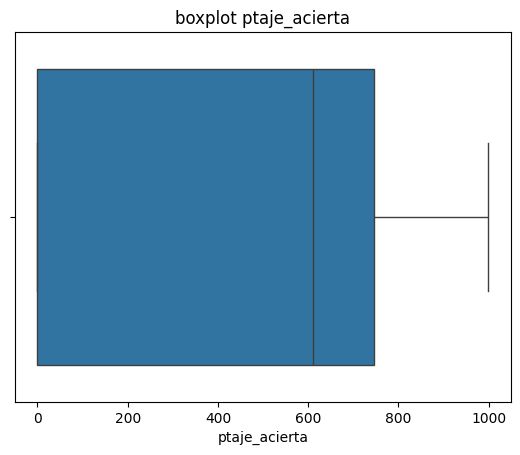

count    267971.000000
mean         48.023749
std          15.601075
min          15.000000
25%          35.000000
50%          46.000000
75%          60.000000
max         106.000000
Name: edad, dtype: float64


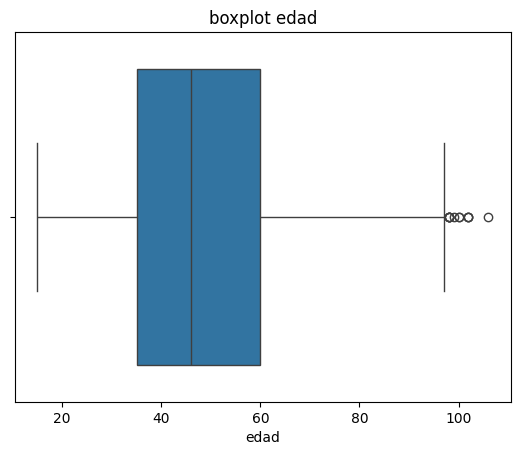

count    267971.000000
mean         11.830814
std          10.825511
min           0.000000
25%           2.000000
50%           8.000000
75%          21.000000
max          61.000000
Name: antiguedad_anios, dtype: float64


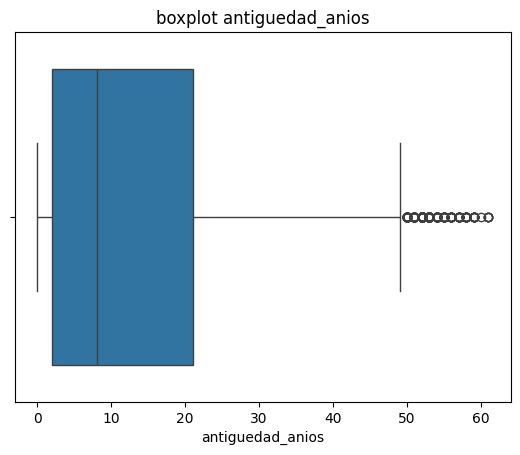

count    267971.000000
mean          3.508249
std           3.587207
min           0.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          25.000000
Name: suma_productos, dtype: float64


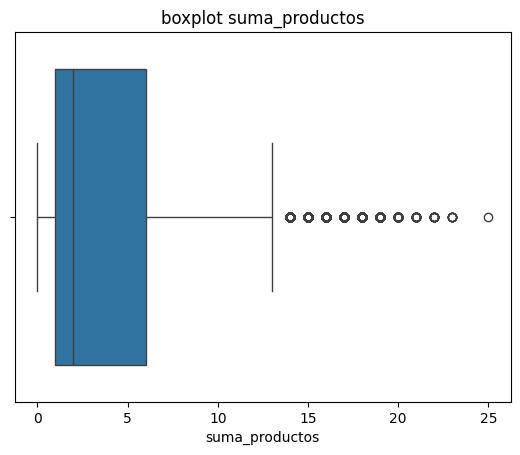

count    2.679710e+05
mean     4.495059e+06
std      4.427962e+06
min      0.000000e+00
25%      3.250000e+05
50%      3.217358e+06
75%      8.004406e+06
max      6.423410e+07
Name: saldo_aportes, dtype: float64


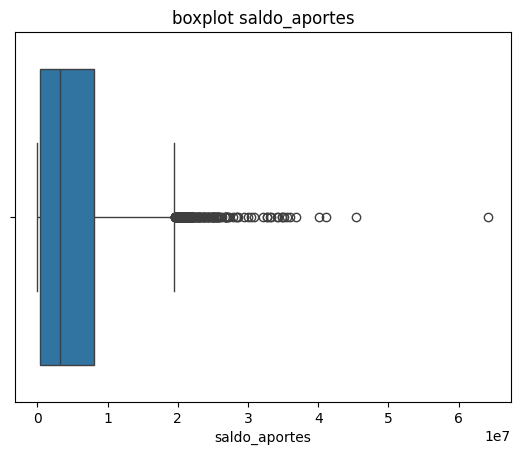

In [46]:
## nos traemos las columnas numericas ##

numericas = df.select_dtypes('number')

numericas.columns

for col in numericas.columns:
    print(df[col].describe())

    sns.boxplot(x = col, data= numericas)
    plt.title(f'boxplot {col}')
    plt.show()

In [47]:
for col in numericas.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1  

    outliers = df[col][(df[col] < (q1 - 1.5 * IQR)) | (df[col] > (q3 + 1.5 * IQR))]
    
    print(f'número de outliers columna {col}: {len(outliers)}')

número de outliers columna EDAD_CARTERA_INICIAL: 0
número de outliers columna EDAD_CARTERA_FINAL: 0
número de outliers columna personas_a_cargo: 37174
número de outliers columna ingresos: 21286
número de outliers columna ptaje_acierta: 0
número de outliers columna edad: 12
número de outliers columna antiguedad_anios: 456
número de outliers columna suma_productos: 4059
número de outliers columna saldo_aportes: 196


## Variables que no necesitan tratamiento de Outliers ##

- Edad de cartera Final e Inicial no necesitan tratamiento.

- La variable puntaje acierta no necesita tratemiento.

## Tratamiento de Outliers ##

In [48]:
## Columna eddad ## -- Al ser tan pocos valores extremos, se eliminan del df ##

df = df[df['edad']  <= (df['edad'].quantile(0.75) + 1.5 * (df['edad'].quantile(0.75) - df['edad'].quantile(0.25)))]

df['edad'].max()

np.int64(97)

In [49]:
## Vamos a generar el mismo tratamiento para la columna antinguedad en años ##


df = df[df['antiguedad_anios'] <= (df['antiguedad_anios'].quantile(0.75) + 1.5 * (df['antiguedad_anios'].quantile(0.75) - df['antiguedad_anios'].quantile(0.25)))]

df['antiguedad_anios'].max()


np.int64(49)

In [50]:
## Generamos el mismo tratamiento anterior a la variable saldo_aportes, ya que los outliers son solo 167 ##

df = df[df['saldo_aportes'] <= (df['saldo_aportes'].quantile(0.75) + 1.5 * (df['saldo_aportes'].quantile(0.75) - df['saldo_aportes'].quantile(0.25)))]

df['saldo_aportes'].max()

np.float64(19509166.0)

## Variable Personas a cargo 

In [51]:
## Validamos la proporción de los valores unicos de la variable ##

df['personas_a_cargo'].value_counts(normalize=True)

personas_a_cargo
0     0.861761
1     0.099146
2     0.029965
3     0.006924
4     0.001609
5     0.000352
6     0.000086
9     0.000049
7     0.000034
20    0.000011
10    0.000011
13    0.000007
21    0.000007
32    0.000004
11    0.000004
16    0.000004
14    0.000004
69    0.000004
12    0.000004
19    0.000004
23    0.000004
84    0.000004
8     0.000004
Name: proportion, dtype: float64

In [52]:
## Debido a que el 86% de la columna presenta valor 0 y que hay datos atipicos que dan a inferir que la columna no es confiable
## Se toma la decisión de eliminar la columna 

df.drop('personas_a_cargo', axis=1,inplace=True)

df.columns

Index(['nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL',
       'nombre_tipo_vinculacion', 'estado_civil', 'estrato',
       'nombre_tipo_vivienda', 'nombre_nivel_academico', 'ingresos',
       'nombre_ocupacion', 'ptaje_acierta', 'edad', 'regional',
       'antiguedad_anios', 'suma_productos', 'saldo_aportes'],
      dtype='object')

In [53]:
## Variable Ingresos ##
## Se decide eliminar todos los outliers ##

df = df[df['ingresos']  <= (df['ingresos'].quantile(0.75) + 1.5 * (df['ingresos'].quantile(0.75) - df['ingresos'].quantile(0.25)))]

df['ingresos'].max()

np.float64(14310000.0)

count    246064.000000
mean          2.123606
std           2.980290
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max           7.000000
Name: EDAD_CARTERA_INICIAL, dtype: float64


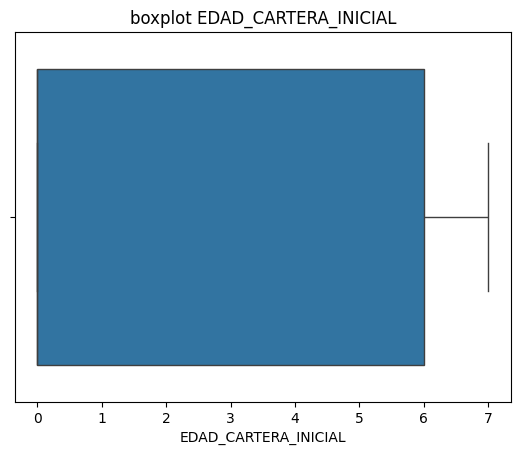

count    246064.000000
mean          1.937943
std           2.716219
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max           7.000000
Name: EDAD_CARTERA_FINAL, dtype: float64


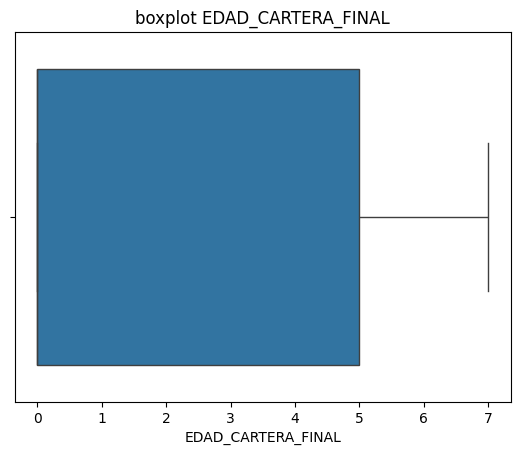

count    2.460640e+05
mean     4.331844e+06
std      3.073045e+06
min      0.000000e+00
25%      2.110712e+06
50%      3.530280e+06
75%      5.900000e+06
max      1.431000e+07
Name: ingresos, dtype: float64


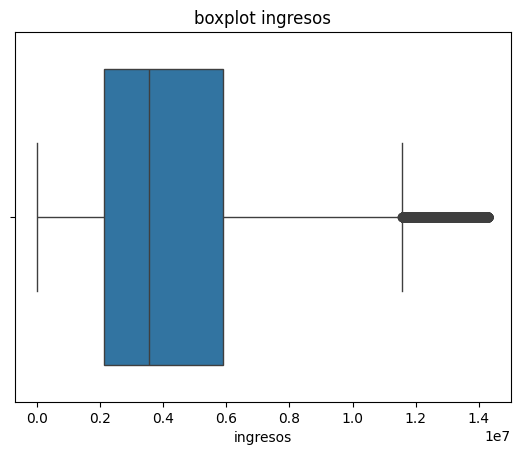

count    246064.000000
mean        454.202220
std         346.438269
min           0.000000
25%           0.000000
50%         615.000000
75%         745.000000
max         999.000000
Name: ptaje_acierta, dtype: float64


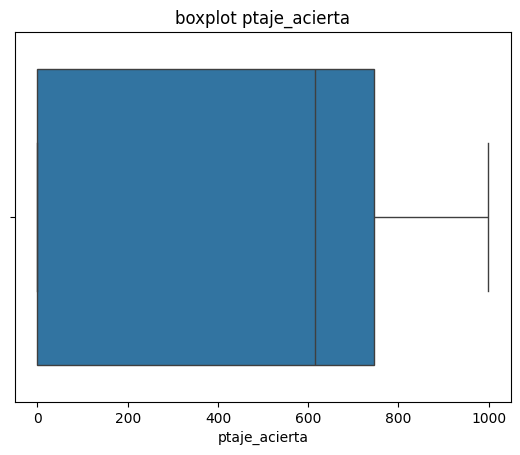

count    246064.000000
mean         47.489738
std          15.691633
min          15.000000
25%          35.000000
50%          45.000000
75%          60.000000
max          97.000000
Name: edad, dtype: float64


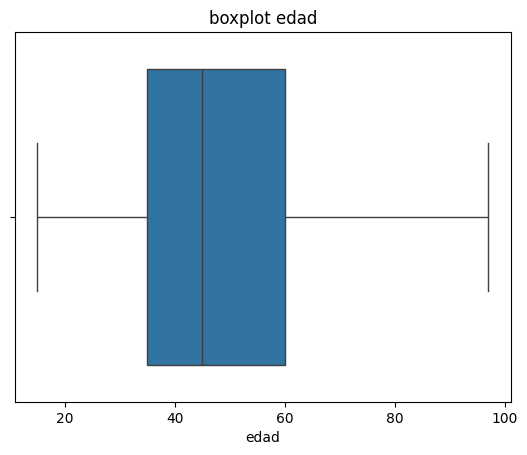

count    246064.000000
mean         11.434155
std          10.576518
min           0.000000
25%           2.000000
50%           8.000000
75%          20.000000
max          49.000000
Name: antiguedad_anios, dtype: float64


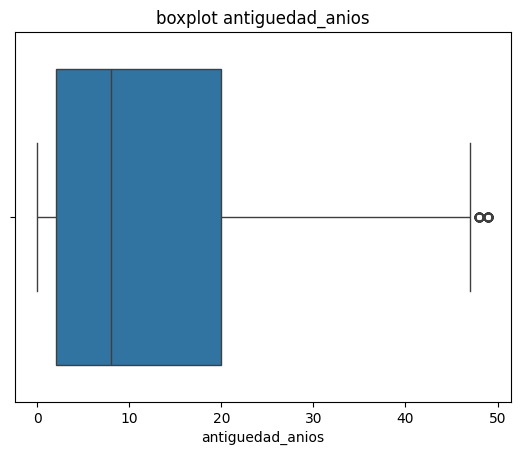

count    246064.000000
mean          3.359687
std           3.494948
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max          25.000000
Name: suma_productos, dtype: float64


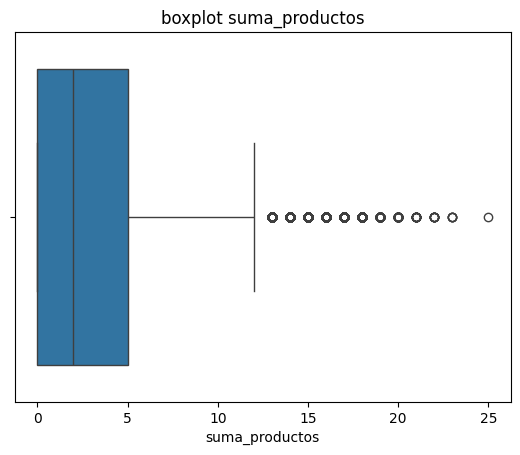

count    2.460640e+05
mean     4.290695e+06
std      4.316516e+06
min      0.000000e+00
25%      2.847000e+05
50%      2.928418e+06
75%      7.669404e+06
max      1.944775e+07
Name: saldo_aportes, dtype: float64


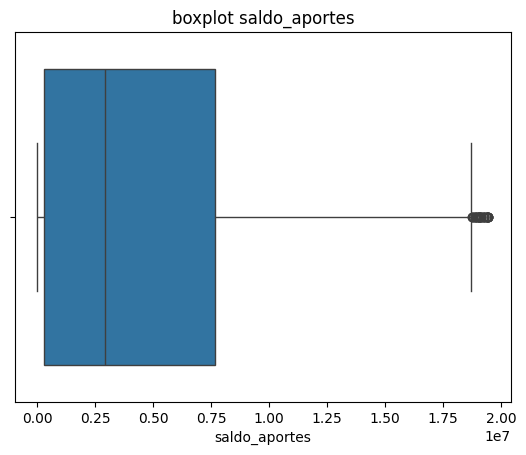

In [54]:
## nos traemos las columnas numericas ##

numericas = df.select_dtypes('number')

numericas.columns

for col in numericas.columns:
    print(df[col].describe())

    sns.boxplot(x = col, data= numericas)
    plt.title(f'boxplot {col}')
    plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246064 entries, 0 to 268045
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            246064 non-null  object 
 1   EDAD_CARTERA_INICIAL     246064 non-null  float64
 2   EDAD_CARTERA_FINAL       246064 non-null  float64
 3   nombre_tipo_vinculacion  246064 non-null  object 
 4   estado_civil             246064 non-null  object 
 5   estrato                  246064 non-null  object 
 6   nombre_tipo_vivienda     246064 non-null  object 
 7   nombre_nivel_academico   246064 non-null  object 
 8   ingresos                 246064 non-null  float64
 9   nombre_ocupacion         246064 non-null  object 
 10  ptaje_acierta            246064 non-null  int64  
 11  edad                     246064 non-null  int64  
 12  regional                 246064 non-null  object 
 13  antiguedad_anios         246064 non-null  int64  
 14  suma_prod

- Una vez se trataron los valores nulos y los valores extremos (outliers), resulto un df de 246.064 filas no nulas, estas seran usadas para el analisis bivariado a continuación

## Analisis Bivariado

In [56]:
## Definimos pago o no ##

df['Pago'] = np.where(df['EDAD_CARTERA_INICIAL'] <= df['EDAD_CARTERA_FINAL'], 1, 0)

df['Pago'].unique()

array([1, 0])

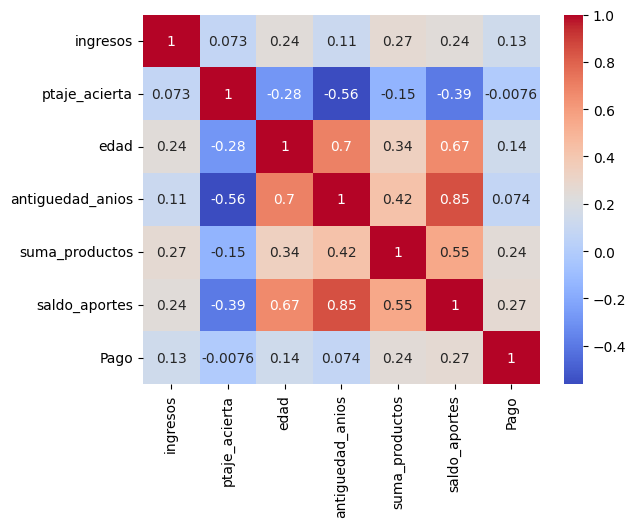

In [59]:
## Vamos a generar el analisis Bibariado ##

df = df.drop(columns=['EDAD_CARTERA_FINAL','EDAD_CARTERA_INICIAL'])

matriz_correlaciones = df.select_dtypes('number').corr(method='spearman')

matriz_correlaciones

sns.heatmap(matriz_correlaciones, cmap='coolwarm', annot=True)  

plt.show()

 - Las variables con mayor correlación son, en primer lugar, saldo_aportes, luego suma_productos seguido por la variable ingreso

## Analisis vibariado saldo_aportes

In [62]:
## Dejaremos a saldo aportes expresado en millones de pesos ##

df['saldo_aportes'] = df['saldo_aportes'] / 1000000

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23168\1704406936.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


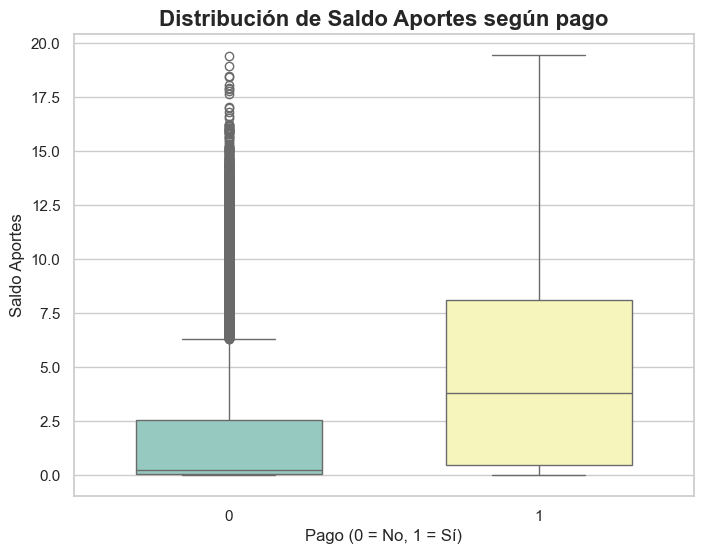

In [63]:
# Estilo de Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

# Boxplot con paleta llamativa
sns.boxplot(
    x='Pago', 
    y='saldo_aportes', 
    data=df, 
    palette='Set3',  # paleta atractiva y suave
    width=0.6
)

# Títulos y etiquetas
plt.title('Distribución de Saldo Aportes según pago', fontsize=16, weight='bold')
plt.xlabel('Pago (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Saldo Aportes', fontsize=12)

plt.show()

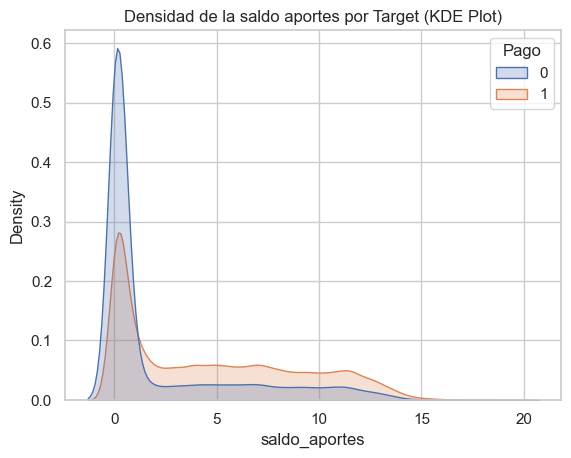

In [72]:
# Gráfico de densidad superpuesto
sns.kdeplot(data=df, x='saldo_aportes', hue='Pago', fill=True, common_norm=False)
plt.title('Densidad de la saldo aportes por Target (KDE Plot)')
plt.show()

In [70]:
## Tabla de frecuencias ##

table_aportes = df.groupby('Pago').agg(Qasociados =('saldo_aportes','size'),
                                       media_aportes = ('saldo_aportes','mean'),
                                       desv_estandar = ('saldo_aportes','std'),
                                       aportes_max = ('saldo_aportes','max'),
                                       aportes_min = ('saldo_aportes','min')).reset_index()

table_aportes

,Pago,Qasociados,media_aportes,desv_estandar,aportes_max,aportes_min
0,0,39341,2.138026,3.590748,19.433937,0.0
1,1,206723,4.700365,4.321436,19.447754,0.0


- En general, mediante el analisis grafico y la tabla de frecuencia, se encuentra que las personas que tienden a pagar dentro del mes, tienen un saldo (ahorros dentro de la cooperativa) mas alto que los que no pagan.

- Al notar este patron (escalera), es decir, mayor saldo aporte, mayor densidad de personas que pagan, se puede concluir que la variable saldo_aportes seria una buena regresora en una analis de clasificación.

## Variable Suma Producto

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23168\419239292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


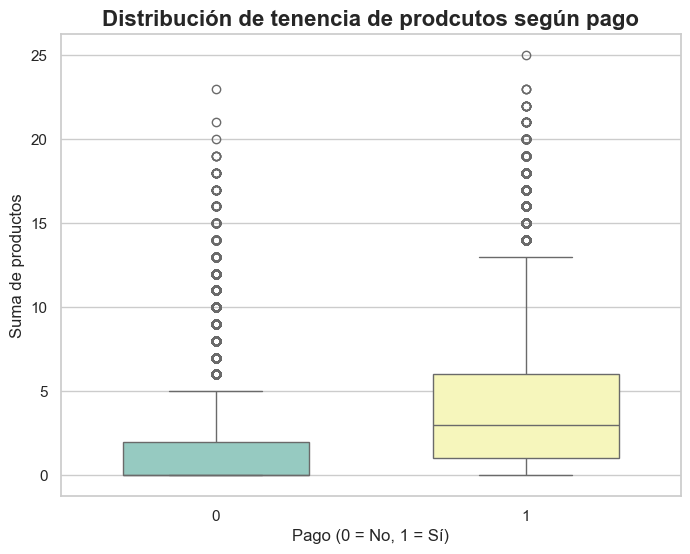

In [71]:
# Estilo de Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

# Boxplot con paleta llamativa
sns.boxplot(
    x='Pago', 
    y='suma_productos', 
    data=df, 
    palette='Set3',  # paleta atractiva y suave
    width=0.6
)

# Títulos y etiquetas
plt.title('Distribución de tenencia de prodcutos según pago', fontsize=16, weight='bold')
plt.xlabel('Pago (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Suma de productos', fontsize=12)

plt.show()

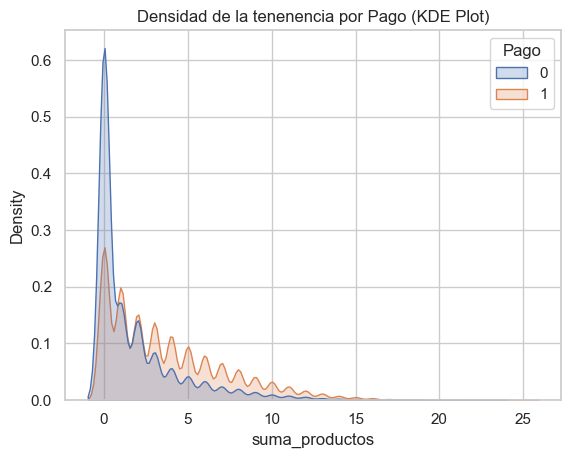

In [73]:
# Gráfico de densidad superpuesto
sns.kdeplot(data=df, x='suma_productos', hue='Pago', fill=True, common_norm=False)
plt.title('Densidad de la tenenencia por Pago (KDE Plot)')
plt.show()

In [75]:
## Tabla de frecuencias ##

table_suma_productos = df.groupby('Pago').agg(Qasociados =('suma_productos','size'),
                                       media_productos = ('suma_productos','mean'),
                                       desv_estandar = ('suma_productos','std'),
                                       prudctos_max = ('suma_productos','max'),
                                       productos_min = ('suma_productos','min')).reset_index()

table_suma_productos

,Pago,Qasociados,media_productos,desv_estandar,prudctos_max,productos_min
0,0,39341,1.740246,2.694213,23.0,0.0
1,1,206723,3.667879,3.544539,25.0,0.0


- En general, mediante el analisis grafico y la tabla de frecuencia, se encuentra que las personas que tienden a pagar dentro del mes, tienen un mayor numero de productos que los asociados que tienden an o pagar. Validando la densidad de la variable segun pago, encontramos que la gran mayoria de asociados que no pagan se encuentran en un rango entre 0 y 2 productos, por otro lado los que si tienden a pagar tienen mayor densidad en valores superiores a 3 y a medida que la suma de productos aumenta se hace mas representativa la densidad  de la clase 1(pago). 

- Al notar este patron (escalera), es decir, mayor suma de productos, mayor densidad de personas que pagan, se puede concluir que la variable suma de productos seria una buena regresora en una analis de clasificación.

## Variable Ingresos

In [78]:
## Dejaremos a ingresos expresado en millones de pesos ##

df['ingresos'] = df['ingresos'] / 1000000

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23168\2973658303.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


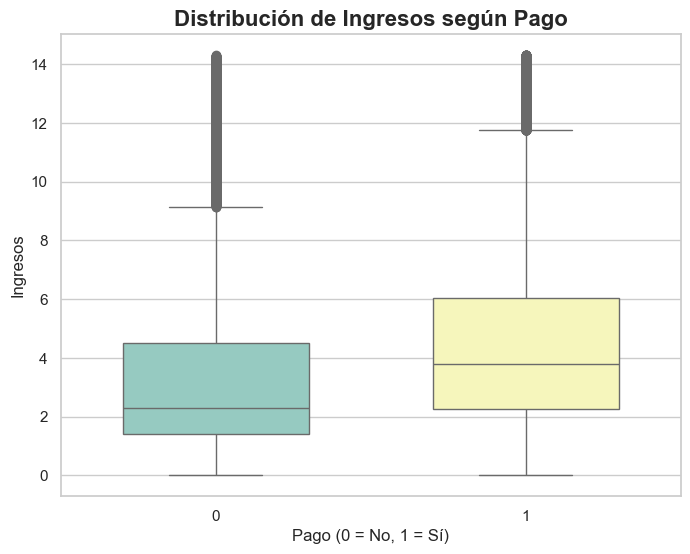

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

# Boxplot con paleta llamativa
sns.boxplot(
    x='Pago', 
    y='ingresos', 
    data=df, 
    palette='Set3',  # paleta atractiva y suave
    width=0.6
)

# Títulos y etiquetas
plt.title('Distribución de Ingresos según Pago', fontsize=16, weight='bold')
plt.xlabel('Pago (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)

plt.show()


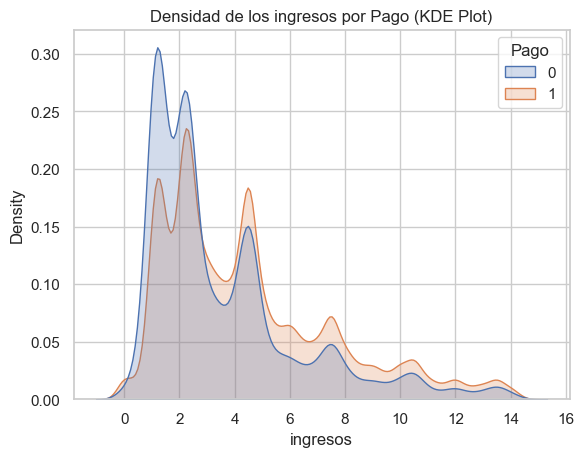

In [80]:
# Gráfico de densidad superpuesto
sns.kdeplot(data=df, x='ingresos', hue='Pago', fill=True, common_norm=False)
plt.title('Densidad de los ingresos por Pago (KDE Plot)')
plt.show()

In [81]:
## Tabla de frecuencias ##

table_ingresos = df.groupby('Pago').agg(Qasociados =('ingresos','size'),
                                       media_ingresos = ('ingresos','mean'),
                                       desv_estandar = ('ingresos','std'),
                                       ingresos_max = ('ingresos','max'),
                                       ingresos_min = ('ingresos','min')).reset_index()

table_ingresos

,Pago,Qasociados,media_ingresos,desv_estandar,ingresos_max,ingresos_min
0,0,39341,3.542586,2.809329,14.306,0.0
1,1,206723,4.482046,3.098025,14.310,0.0


- En general, mediante el analisis grafico y la tabla de frecuencia, se encuentra que las personas que tienden a pagar dentro del mes, tienen un mayor ingreso que aqueyos que tienden a no pagar. Validando la densidad de la variable ingresos según la categoria, nos encontramos que la mayor proporción de los asociados que no pagan tienen ingresos bajos (o a 2 millones), a medida que va creciendo la variable ingresos, la categoria 1 (pago) gana mayor densidad.

- Al notar este patron (escalera), es decir, mayores ingresos, mayor densidad de personas que pagan, se puede concluir que la variable ingresos seria una buena regresora en una analis de clasificación.